In [1]:
# Importing necessary packages for python
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.linear_model import LogisticRegression
import warnings
import matplotlib.pyplot as plt
import plotly.tools as tls
import datetime as dt

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', DeprecationWarning)
pd.set_option('mode.chained_assignment', None)

%matplotlib inline

In [2]:
# Importing data from Lab#1 and exploring the data, the csv file is the result dataset from Lab1
path = "../Data/" # Generic path
incident = pd.read_csv(path + 'LAB1_completed_Dataset_clean.csv', low_memory= False)

In [3]:
incident.head()

,Unnamed: 0,Year_of_Incident,Service_Number_ID,Watch,Type_of_Incident,Type_Location,Reporting_Area,Beat,Division,Sector,...,Location1,Call_Received,Call_Cleared,Call_Dispatch,Number_of_offense,Response_time,Latitude,Longitude,Arrest_status,Call_Received_Hour
0,2,2016,175975-2016-01,1,BMV,Motor Vehicle,3104.0,542.0,NORTHWEST,540.0,...,"3136 HUDNALL ST\r\nDALLAS, TX 75235\r\n(32.823...",2016-07-22 03:43:21,2016-07-22 11:49:54,2016-07-22 03:52:33,01,9.0,3.282394e+01,-9.682623e+01,1,3.0
1,5,2015,258177-2015-01,3,DEADLY CONDUCT,Apartment Parking Lot,4380.0,451.0,SOUTHWEST,450.0,...,"3913 GANNON LN\r\nDALLAS, TX 75237\r\n(32.6539...",2015-11-05 18:37:20,2015-11-05 19:32:15,2015-11-05 18:51:51,01,14.0,3.265393e+01,-9.688384e+01,0,18.0
2,6,2017,065324-2017-01,2,BMV,"Highway, Street, Alley ETC",4411.0,132.0,CENTRAL,130.0,...,"1800 N ST PAUL ST\r\nDALLAS, TX 75201\r\n(2490...",2017-03-23 18:36:32,2017-03-23 19:48:44,2017-03-23 18:51:25,01,14.0,2.490567e+06,6.973511e+06,0,18.0
3,8,2018,165442-2018-01,2,MIR (MISCELLANEOUS INCIDENT REPORT NO OFFENSE),"Highway, Street, Alley ETC",3106.0,544.0,NORTHWEST,540.0,...,"4800 LEMMON AVE\r\nHIGHLAND PARK, TX 75219\r\n...",2018-07-28 15:12:54,2018-07-28 17:31:57,2018-07-28 15:48:21,01,35.0,3.282183e+01,-9.681709e+01,0,15.0
4,10,2018,159507-2018-01,1,ACCIDENT INV DAMAGE TO VEHICLE > OR EQUAL $200,"Highway, Street, Alley ETC",4357.0,737.0,SOUTH CENTRAL,730.0,...,"6100 FLAGSTAFF DR\r\nDALLAS, TX 75241\r\n(32.6...",2018-07-21 07:28:35,2018-07-21 09:01:49,2018-07-21 07:37:16,01,8.0,3.267381e+01,-9.675580e+01,0,7.0


In [4]:
%%time

# Exploying the dataset
incident['Response_time'] = incident['Response_time'].fillna(incident['Response_time'].mean()).astype(np.int)
incident = incident[incident['Call_Received_Hour'].isnull()==False]
incident_NullCols = incident.isnull().sum()
incident_NullCols = incident_NullCols[incident_NullCols > 0]

# Dropna on Datetime columns
incident.dropna(subset=['Call_Cleared_Date_Time', 'Call_Dispatch_Date_Time', 'Call_Received_Date_Time'], inplace=True)

# Print out the data properties
print(incident.shape)
print('Number of null columns and their counts')
print(incident_NullCols)

# Convert Date Time columns from Char to Datetime Format
# Call_Cleared_Date_Time
# Call_Dispatch_Date_Time
# Call_Received_Date_Time    

incident['Call_Cleared_Date_Time'] = pd.to_datetime(incident['Call_Cleared_Date_Time'])
incident['Call_Dispatch_Date_Time'] = pd.to_datetime(incident['Call_Dispatch_Date_Time'])
incident['Call_Received_Date_Time'] = pd.to_datetime(incident['Call_Received_Date_Time'])

# Convert Date Time columns from Datetime to EPOCH Format
# incident['Call_Cleared_Date_Time'] = incident['Call_Cleared_Date_Time'].astype('int64')
# incident['Call_Dispatch_Date_Time'] = incident['Call_Dispatch_Date_Time'].astype('int64')
# incident['Call_Received_Date_Time'] = incident['Call_Received_Date_Time'].astype('int64')

incident['Call_Cleared_Date_Time'] = (incident['Call_Cleared_Date_Time'] - dt.datetime(1970,1,1)).dt.total_seconds()
incident['Call_Cleared_Date_Time'] = incident['Call_Cleared_Date_Time'].astype('int64')
incident['Call_Dispatch_Date_Time'] = (incident['Call_Dispatch_Date_Time'] - dt.datetime(1970,1,1)).dt.total_seconds()
incident['Call_Dispatch_Date_Time'] = incident['Call_Dispatch_Date_Time'].astype('int64')
incident['Call_Received_Date_Time'] = (incident['Call_Received_Date_Time'] - dt.datetime(1970,1,1)).dt.total_seconds()
incident['Call_Received_Date_Time'] = incident['Call_Received_Date_Time'].astype('int64')

incident.info()

(253905, 45)
Number of null columns and their counts
Type_Location                4856
Reporting_Area                155
Beat                           70
Sector                         70
Call_Cleared_Date_Time        165
Call_Dispatch_Date_Time        21
Offense_Status                557
Victim_Condition           233793
Family_Offense                 32
Weapon_Used                 28804
UCR_Offense_Name            14475
UCR_Code                    14475
X_Coordinate                21095
Y_Coordinate                21095
State                         608
Call_Cleared                  165
Call_Dispatch                  21
Latitude                     9755
Longitude                    9755
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 253905 entries, 0 to 255153
Data columns (total 45 columns):
Unnamed: 0                 253905 non-null int64
Year_of_Incident           253905 non-null int64
Service_Number_ID          253905 non-null object
Watch                      25

In [5]:
incident['Call_Dispatch_Date_Time'].head()

0    1469159553
1    1446749511
2    1490295085
3    1532792901
4    1532158636
Name: Call_Dispatch_Date_Time, dtype: int64

In [6]:
# Further cleanup the dataset
incident = incident[incident['Watch']!=0]
incident = incident[(incident['Victim_Age']>=0) & (incident['Victim_Age']<=90)]
incident = incident[incident['Victim_Race']!="Unknown"]
incident = incident[incident['Victim_Type']!="Unknown"]
incident= incident[incident.Number_of_offense != "RP"]

incident = incident[incident['Victim_Gender']!="U"]

In [7]:
# Further data clean up on the feature variables

incident.loc[:,'UCR_Offense_Name'] = incident['UCR_Offense_Name'].fillna("MISSING")

# Setup the UCR Offense Name Groups
THEFT_FRAUD     = dict.fromkeys(['THEFT/BMV', 'THEFT ORG RETAIL', 'BURGLARY-RESIDENCE', 'OTHER THEFTS',
                                 'ROBBERY-INDIVIDUAL','THEFT/SHOPLIFT', 'BURGLARY-BUSINESS', 'FORGE & COUNTERFEIT', 
                                 'FRAUD', 'EMBEZZLEMENT','ROBBERY-BUSINESS','THEFT ORG RETAIL'],"THEFT_FRAUD" ) 
MVA_TRAFFIC      =dict.fromkeys(['ACCIDENT MV', 'MOTOR VEHICLE ACCIDENT', 'UUMV', 'TRAFFIC VIOLATION',
                                 'TRAFFIC FATALITY'],"MVA_TRAFFIC" )        
WEAPONS_FIREARMS =dict.fromkeys(['WEAPONS', 'ARSON', 'INJURED FIREARM'], "WEAPONS_FIREARMS")         
ASSUALT          = dict.fromkeys(['ASSAULT','VANDALISM & CRIM MISCHIEF', 'AGG ASSAULT - NFV', 'OFFENSE AGAINST CHILD',
                                  'AGG ASSAULT - FV'], "ASSUALT")
OTHERS_THREATS   = dict.fromkeys(['FOUND', 'OTHERS', 'LOST', 'CRIMINAL TRESPASS', 'DISORDERLY CONDUCT', 
                                  'ANIMAL BITE','INJURED HOME','INJURED PUBLIC', 'TERRORISTIC THREAT', 
                                  'EVADING', 'INJURED OCCUPA', 'ORANIZED CRIME', 'KIDNAPPING', 
                                  'RESIST ARREST','FAIL TO ID', 'HUMAN TRAFFICKING', 'MISSING'], "OTHERS_THREATS")
INTOXICATION     = dict.fromkeys(['DRUNK & DISORDERLY', 'DWI', 'NARCOTICS & DRUGS', 'LIQUOR OFFENSE', 
                                  'INTOXICATION MANSLAUGHTER'],"INTOXICATION")
MURDER_DEATH     = dict.fromkeys(['SUDDEN DEATH&FOUND BODIES','MURDER'], "MURDER_DEATH")
                    
# Regroup the UCR_Offense_Name
incident.loc[:,'UCR_Offense_Name']= incident['UCR_Offense_Name'].replace(THEFT_FRAUD)
incident.loc[:,'UCR_Offense_Name']= incident['UCR_Offense_Name'].replace(MVA_TRAFFIC)
incident.loc[:,'UCR_Offense_Name']= incident['UCR_Offense_Name'].replace(WEAPONS_FIREARMS)
incident.loc[:,'UCR_Offense_Name']= incident['UCR_Offense_Name'].replace(ASSUALT)
incident.loc[:,'UCR_Offense_Name']= incident['UCR_Offense_Name'].replace(OTHERS_THREATS)
incident.loc[:,'UCR_Offense_Name']= incident['UCR_Offense_Name'].replace(INTOXICATION)
incident.loc[:,'UCR_Offense_Name']= incident['UCR_Offense_Name'].replace(MURDER_DEATH)

In [8]:
# Change norminal attributes to numeric
incident.loc[:,'IsMale'] = incident.Victim_Gender=='M' 
incident.IsMale = incident.IsMale.astype(np.int)
incident.loc[:,'Social_crime_score'] = incident['Hate_Crime']+incident['Gang_Related_Offense']+incident['Drug_Related']
incident.loc[:,'Victim_Age'] = incident['Victim_Age'].astype(np.int)
incident.loc[:,'Number_of_offense']= incident.Number_of_offense.astype(np.int)
# coding
incident['UCR_Offense_Name'] = pd.Categorical(incident['UCR_Offense_Name']).codes
incident['Day1_of_the_Week'] = pd.Categorical(incident['Day1_of_the_Week']).codes
incident['Division'] = pd.Categorical(incident['Division']).codes
incident['Victim_Type'] = pd.Categorical(incident['Victim_Type']).codes
incident['Victim_Race'] = pd.Categorical(incident['Victim_Race']).codes

In [9]:
incident.columns

Index(['Unnamed: 0', 'Year_of_Incident', 'Service_Number_ID', 'Watch',
       'Type_of_Incident', 'Type_Location', 'Reporting_Area', 'Beat',
       'Division', 'Sector', 'Council_District', 'Day1_of_the_Week',
       'Call_Received_Date_Time', 'Call_Cleared_Date_Time',
       'Call_Dispatch_Date_Time', 'Person_Involvement_Type', 'Victim_Type',
       'Victim_Race', 'Victim_Gender', 'Victim_Age', 'Offense_Status',
       'Victim_Condition', 'Hate_Crime', 'Family_Offense', 'Weapon_Used',
       'Gang_Related_Offense', 'Drug_Related', 'UCR_Offense_Name', 'RMS_Code',
       'UCR_Code', 'X_Coordinate', 'Y_Coordinate', 'Zip_Code', 'City', 'State',
       'Location1', 'Call_Received', 'Call_Cleared', 'Call_Dispatch',
       'Number_of_offense', 'Response_time', 'Latitude', 'Longitude',
       'Arrest_status', 'Call_Received_Hour', 'IsMale', 'Social_crime_score'],
      dtype='object')

In [10]:
incident = incident.drop(['Year_of_Incident', 'Service_Number_ID', 'Type_of_Incident','Type_Location', 
                          'Reporting_Area', 'Beat', 'Sector','Council_District', 'Victim_Race', 'Day1_of_the_Week',
                          'Person_Involvement_Type', 'Zip_Code', 
#                           'Call_Received_Date_Time', 'Call_Cleared_Date_Time', 'Call_Dispatch_Date_Time', 
                          'Victim_Gender', 'Offense_Status', 'Victim_Condition','Family_Offense', 'Weapon_Used', 
                          'RMS_Code', 'UCR_Code','X_Coordinate', 'Y_Coordinate', 'City', 'State',
                          'Location1', 'Call_Received', 'Call_Cleared', 'Call_Dispatch','Latitude', 'Longitude'],axis=1)

In [11]:
incident.sample(2)

,Unnamed: 0,Watch,Division,Call_Received_Date_Time,Call_Cleared_Date_Time,Call_Dispatch_Date_Time,Victim_Type,Victim_Age,Hate_Crime,Gang_Related_Offense,Drug_Related,UCR_Offense_Name,Number_of_offense,Response_time,Arrest_status,Call_Received_Hour,IsMale,Social_crime_score
134241,238623,2,2,1459933507,1459944139,1459933756,2,58,0,0,0,3,1,4,0,9.0,0,0
18208,32321,1,6,1458611308,1458618992,1458611568,2,43,0,0,0,5,1,4,0,1.0,1,0


Class 0: 202193
Class 1: 23094
Proportion: 8.76 : 1


<Figure size 576x360 with 0 Axes>

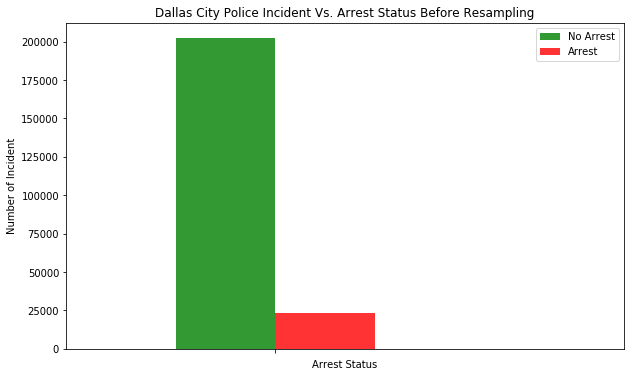

In [12]:
# Explore response variable distribution
plt.figure(figsize=(8,5))
target_count = incident.Arrest_status.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

# Draw bar plot

# data to plot
n_groups = 1
NoArrest=incident.Arrest_status.value_counts()[0]
Arrest=incident.Arrest_status.value_counts()[1]
 
# create plot
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8
plt.figure(figsize=(10,6))
plt.bar(index, NoArrest, bar_width,
                 alpha=opacity,
                 color='g',
                 label='No Arrest')
 
plt.bar(index + bar_width, Arrest, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Arrest')
 
plt.xlabel('Arrest Status')
plt.ylabel('Number of Incident')
plt.title('Dallas City Police Incident Vs. Arrest Status Before Resampling')
plt.xlim(-0.8, 2)
plt.xticks(index + bar_width/2, (''))
plt.legend()
 
plt.show()

In [13]:
# # Import resample package
# from sklearn.utils import resample

# # Downsampling
# df_majority = incident[incident.Arrest_status==0]
# df_minority = incident[incident.Arrest_status==1]
 
# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=23094,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# # Display new class counts
# df_downsampled.Arrest_status.value_counts()

In [14]:
# n_groups = 1
# NoArrest=df_downsampled.Arrest_status.value_counts()[0]
# Arrest=df_downsampled.Arrest_status.value_counts()[1]
 
# # create plot
# #ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.5
# opacity = 0.8
# plt.figure(figsize=(10,6))
# plt.bar(index, NoArrest, bar_width,
#                  alpha=opacity,
#                  color='g',
#                  label='No Arrest')
 
# plt.bar(index + bar_width, Arrest, bar_width,
#                  alpha=opacity,
#                  color='r',
#                  label='Arrest')
 
# plt.xlabel('Arrest Status')
# plt.ylabel('Number of Incident')
# plt.title('Dallas City Police Incident Vs. Arrest Status After Resampling')
# plt.xlim(-0.8, 2)
# plt.xticks(index + bar_width/2, (''))
# plt.legend()
 
# #plt.tight_layout()
# plt.show()


In [15]:
# copy the down sampling dataset to original incident data frame and continue the anl
# incident= df_downsampled.copy()

In [16]:
#Create correlation matrix
CorrMat = incident.corr()

# Highest Correlation Pairs
corrPairs = CorrMat.unstack().sort_values(kind="quicksort", ascending=False)
#- REMOVE DUPLICATES
corrPairs = corrPairs[::2]
corrPairs = corrPairs[corrPairs.index.get_level_values(0) != corrPairs.index.get_level_values(1)]
with pd.option_context('display.max_rows',10):
    print(corrPairs)

Call_Received_Date_Time  Call_Dispatch_Date_Time    1.000000
                         Call_Cleared_Date_Time     0.999972
Call_Cleared_Date_Time   Call_Dispatch_Date_Time    0.999972
Drug_Related             Social_crime_score         0.854221
Watch                    Call_Received_Hour         0.661572
                                                      ...   
Response_time            Social_crime_score        -0.050088
Division                 UCR_Offense_Name          -0.056816
UCR_Offense_Name         Watch                     -0.076426
Arrest_status            Response_time             -0.096978
UCR_Offense_Name         Arrest_status             -0.202279
Length: 153, dtype: float64


In [17]:

#Drop highly correlated, insignificant and high VIF columns.
incident = incident.drop(['Drug_Related','Watch','Gang_Related_Offense','Hate_Crime'], axis=1)

#Create correlation matrix
CorrMat = incident.corr()

# Highest Correlation Pairs
corrPairs = CorrMat.unstack().sort_values(kind="quicksort", ascending=False)
#- REMOVE DUPLICATES
corrPairs = corrPairs[::2]
corrPairs = corrPairs[corrPairs.index.get_level_values(0) != corrPairs.index.get_level_values(1)]
with pd.option_context('display.max_rows',10):
    print(corrPairs)

Call_Received_Date_Time  Call_Dispatch_Date_Time    1.000000
Call_Cleared_Date_Time   Call_Received_Date_Time    0.999972
                         Call_Dispatch_Date_Time    0.999972
Unnamed: 0               Call_Received_Date_Time    0.243089
                         Call_Dispatch_Date_Time    0.243089
                                                      ...   
Response_time            Number_of_offense         -0.042419
Social_crime_score       Response_time             -0.050088
UCR_Offense_Name         Division                  -0.056816
Response_time            Arrest_status             -0.096978
Arrest_status            UCR_Offense_Name          -0.202279
Length: 91, dtype: float64


In [18]:
# Y Response variable dataframe
inci_Y = incident['Arrest_status']

# Features with no predictive features with respect to resposne variable
inci_X = incident.drop(['Arrest_status'],axis=1)


In [19]:
inci_Y.count()

225287

In [20]:
from sklearn.preprocessing import StandardScaler

#Scale data
scaler = StandardScaler()
# inci_X = scaler.fit_transform(inci_X)

#Save as data frames
inci_X = pd.DataFrame(scaler.fit_transform(inci_X), columns=inci_X.columns)
inci_X.head()

,Unnamed: 0,Division,Call_Received_Date_Time,Call_Cleared_Date_Time,Call_Dispatch_Date_Time,Victim_Type,Victim_Age,UCR_Offense_Name,Number_of_offense,Response_time,Call_Received_Hour,IsMale,Social_crime_score
0,-1.715359,-0.057161,-0.010744,-0.010230,-0.010760,0.007051,0.820985,0.898067,-0.193623,-0.431360,-1.552211,0.932474,-0.1164
1,-1.715337,1.455243,-0.595468,-0.595612,-0.595476,0.007051,0.615549,-1.516044,-0.193623,-0.215865,0.845110,0.932474,-0.1164
2,-1.715329,-1.569564,0.540709,0.540557,0.540702,0.007051,-1.438812,0.898067,-0.193623,-0.215865,0.845110,0.932474,-0.1164
3,-1.715314,-0.057161,1.649516,1.649434,1.649542,0.007051,-0.754025,0.415245,-0.193623,0.689213,0.365646,0.932474,-0.1164
4,-1.715299,0.446974,1.633009,1.632856,1.632993,0.007051,-1.027940,0.415245,-0.193623,-0.474459,-0.912925,-1.072415,-0.1164


In [21]:
# from sklearn.model_selection import train_test_split

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(inci_X,inci_Y,
#                                                     test_size=0.20, random_state=101)

In [23]:
from sklearn.model_selection import StratifiedKFold

In [24]:
%%time

skf = StratifiedKFold(n_splits=2, random_state=0, shuffle=True)
for train_index, test_index in skf.split(inci_X, inci_Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = inci_X.iloc[train_index,], inci_X.iloc[test_index,]
    y_train, y_test = inci_Y.iloc[train_index,], inci_Y.iloc[test_index,]

TRAIN: [     0      2      3 ... 225283 225284 225286] TEST: [     1      4      6 ... 225279 225281 225285]
TRAIN: [     1      4      6 ... 225279 225281 225285] TEST: [     0      2      3 ... 225283 225284 225286]
Wall time: 138 ms


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
%%time

knn.fit(X_train,y_train)

Wall time: 50.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
%%time

pred = knn.predict(X_test)

Wall time: 1min 53s


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
%%time

print(confusion_matrix(y_test,pred))

[[91478  9618]
 [ 9466  2081]]
Wall time: 121 ms


In [31]:
%%time

print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.90      0.91    101096
          1       0.18      0.18      0.18     11547

avg / total       0.83      0.83      0.83    112643

Wall time: 37.4 ms


In [32]:
%%time

error_rate = []

# Will take some time
for i in range(1,40):
    
    print("Iteration:: ",i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Iteration::  1
Iteration::  2
Iteration::  3
Iteration::  4
Iteration::  5
Iteration::  6
Iteration::  7
Iteration::  8
Iteration::  9
Iteration::  10
Iteration::  11
Iteration::  12
Iteration::  13
Iteration::  14
Iteration::  15
Iteration::  16
Iteration::  17
Iteration::  18
Iteration::  19
Iteration::  20
Iteration::  21
Iteration::  22
Iteration::  23
Iteration::  24
Iteration::  25
Iteration::  26
Iteration::  27
Iteration::  28
Iteration::  29
Iteration::  30
Iteration::  31
Iteration::  32
Iteration::  33
Iteration::  34
Iteration::  35
Iteration::  36
Iteration::  37
Iteration::  38
Iteration::  39
Wall time: 2h 22min 16s


Wall time: 46.8 ms


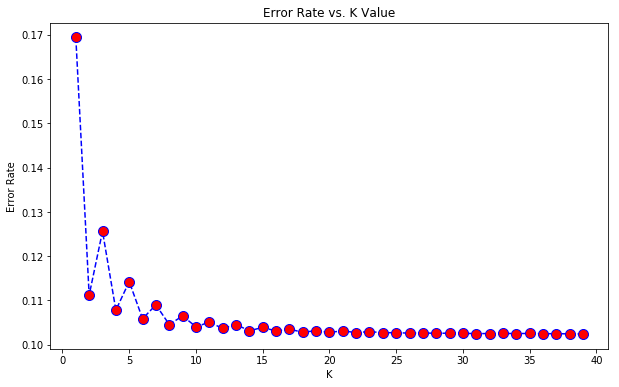

In [33]:
%%time

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
%%time

# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[91478  9618]
 [ 9466  2081]]


             precision    recall  f1-score   support

          0       0.91      0.90      0.91    101096
          1       0.18      0.18      0.18     11547

avg / total       0.83      0.83      0.83    112643

Wall time: 1min 15s


In [35]:
%%time

# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=38
knn = KNeighborsClassifier(n_neighbors=38)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=38')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=38


[[101061     35]
 [ 11505     42]]


             precision    recall  f1-score   support

          0       0.90      1.00      0.95    101096
          1       0.55      0.00      0.01     11547

avg / total       0.86      0.90      0.85    112643

Wall time: 2min 41s


In [36]:
%%time

# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[100972    124]
 [ 11448     99]]


             precision    recall  f1-score   support

          0       0.90      1.00      0.95    101096
          1       0.44      0.01      0.02     11547

avg / total       0.85      0.90      0.85    112643

Wall time: 2min 32s


In [39]:
%%time

# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=44
knn = KNeighborsClassifier(n_neighbors=44)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=44')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=44


[[101069     27]
 [ 11517     30]]


             precision    recall  f1-score   support

          0       0.90      1.00      0.95    101096
          1       0.53      0.00      0.01     11547

avg / total       0.86      0.90      0.85    112643

Wall time: 2min 45s
